In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
def age_group(age: int):
    if age == 18:
        return "18"
    elif 18 < age <= 24:
        return "18-24"
    elif 25 <= age <= 34:
        return "25-34"
    elif 35 <= age <= 44:
        return "35-44"
    elif 45 <= age <= 54:
        return "45-54"
    elif 55 <= age <= 64:
        return "55-64"
    elif age >= 65:
        return "65+"
    return None


data = pd.read_csv("dataset/nyt1.csv")
data_age_no_null = data[data.Age > 0]
data_age_no_null

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1
...,...,...,...,...,...
458432,30,0,4,0,1
458433,21,1,2,0,1
458434,61,1,6,0,1
458435,51,0,7,0,1


In [1]:
data_age_no_null.insert(1, "AgeGroup", [age_group(age) for age in data_age_no_null.Age.to_list()])
data_by_gender_age = data_age_no_null.groupby(["AgeGroup", "Gender"], as_index=False).sum()
data_by_gender_age

NameError: name 'data_age_no_null' is not defined

<AxesSubplot:xlabel='AgeGroup', ylabel='Clicks'>

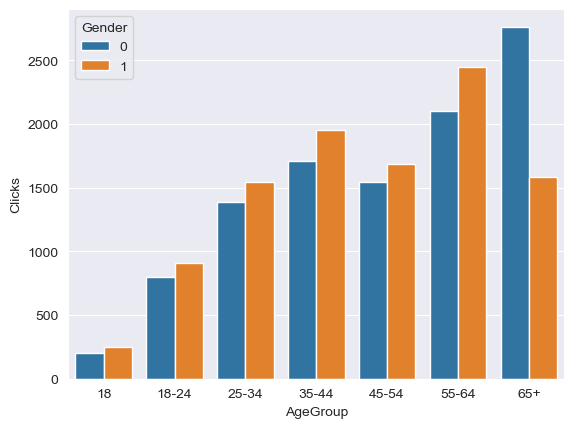

In [3]:
sns.barplot(data=data_by_gender_age,
            x=data_by_gender_age.AgeGroup,
            y=data_by_gender_age.Clicks,
            hue=data_by_gender_age.Gender)

In [4]:
data_groups = data_by_gender_age.groupby(["AgeGroup"], as_index=False).sum()
data_groups


,AgeGroup,Gender,Age,Impressions,Clicks,Signed_In
0,18,1,97632,27001,458,5424
1,18-24,1,750159,176584,1709,35270
2,25-34,1,1716328,290511,2937,58174
3,35-44,1,2798593,355824,3662,70860
4,45-54,1,3181779,322109,3232,64288
5,55-64,1,2661830,224688,4556,44738
6,65+,1,2098644,144120,4350,28753


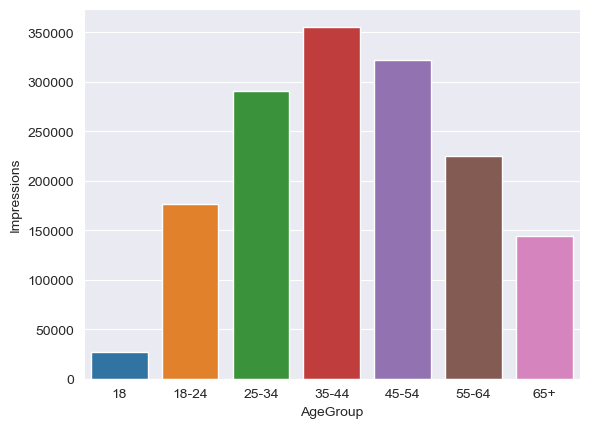

In [5]:
# plt.subplot(1,2,1)
ax=sns.barplot(data=data_groups,
            x=data_groups.AgeGroup,
            y=data_groups.Impressions)
# ax1= ax.twinx()
# ax2=sns.barplot(data=data_groups,
#             x=data_groups.AgeGroup,
#             y=data_groups.Clicks,
#                 alpha=1,
#                 hatch='xx',
#                )
plt.show()

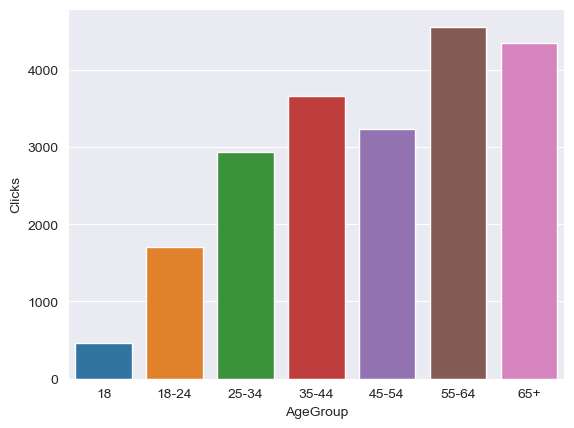

In [6]:
ax3=sns.barplot(data=data_groups,
            x=data_groups.AgeGroup,
            y=data_groups.Clicks, )

In [7]:
def ResultForQuery(search: str, ageGroup: str):
    dict_1 = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}
    days = ["Вівторок", "Середа", "Четверг", "П'ятниця", "Субота", "Неділя", "Понеділок"]
    data=0;
    for i in range(0, 31):
        data = pd.read_csv("dataset/nyt" + str(i + 1) + ".csv")
        data_no_null_age = data[data.Age > 0]
        data_no_null_age.insert(1, "AgeGroup", [age_group(age) for age in data_no_null_age.Age.to_list()])
        data=data_no_null_age[data_no_null_age.Age_Group == ageGroup][search].count()
        dict_1[i % 7] += data
    for key, value in dict_1.items():
        print("{0} -> {1}".format(days[key % 7], value))

In [8]:
ResultForQuery("Clicks", "18-24")

AttributeError: 'DataFrame' object has no attribute 'Age_Group'